In [1]:
import keras
import tensorflow
import flask
import PIL
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from PIL import ImageFile
%matplotlib inline


D:\Anaconda\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [3]:
S=200
trainGen=ImageDataGenerator(rescale=1./255)

In [4]:
s=200 #Shape of our image
trainGen=ImageDataGenerator(
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_set=trainGen.flow_from_directory('data/test',target_size=(s,s),color_mode='rgb',batch_size=15, class_mode='categorical')

Found 7000 images belonging to 2 classes.


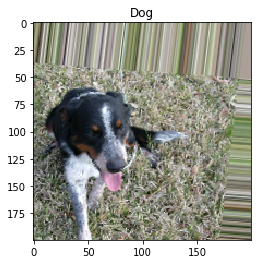

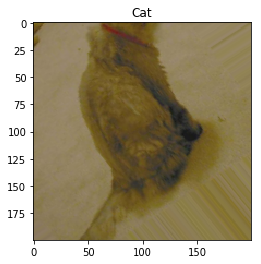

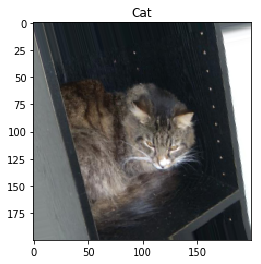

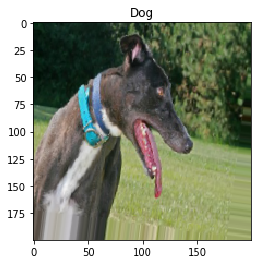

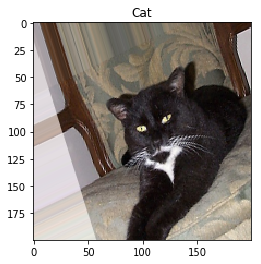

In [5]:
classes=['Cat','Dog']

for i in range(5):
    plt.imshow(train_set[0][0][i]) #first ko 0 le batch, 2md ko 0 le ki 0 ki 1 linxa, i chai indexxing
    label=train_set[0][1][i]
    plt.title(classes[np.argmax(label)])
    plt.show()

In [6]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout
from keras import optimizers
model=Sequential()

In [7]:
model.add(Conv2D(25,(3,3),input_shape=(S,S,3),padding='same',activation='relu'))
model.add(Conv2D)
model.add(Flatten())
model.add(Dense(10, activation='relu'))
model.add(Dense(2,activation='softmax'))
model.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 200, 200, 25)      700       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1000000)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                10000010  
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 22        
Total params: 10,000,732
Trainable params: 10,000,732
Non-trainable params: 0
_________________________________________________________________


In [8]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['acc'])

In [9]:
model.fit_generator(train_set,steps_per_epoch=10,epochs=5)

Instructions for updating:
Use tf.cast instead.
Epoch 1/5
10/10 [==============================] - 10s 972ms/step - loss: 7.1568 - acc: 0.5133
Epoch 2/5
10/10 [==============================] - 9s 898ms/step - loss: 7.1994 - acc: 0.5533
Epoch 3/5
10/10 [==============================] - 9s 942ms/step - loss: 7.9516 - acc: 0.5067
Epoch 4/5
10/10 [==============================] - 11s 1s/step - loss: 7.8441 - acc: 0.5133
Epoch 5/5
10/10 [==============================] - 11s 1s/step - loss: 8.1665 - acc: 0.4933


In [10]:

evaluateGen=ImageDataGenerator(rescale=1./255)

evaluate_set=evaluateGen.flow_from_directory('data/valid',target_size=(s,s),color_mode='rgb',batch_size=2, class_mode='categorical')

Found 2000 images belonging to 2 classes.


In [11]:
score=model.evaluate_generator(evaluate_set,steps=1)
score

[8.05904769897461, 0.5]

In [12]:
testGen=ImageDataGenerator(rescale=1./255)
test_set=testGen.flow_from_directory('data/test',target_size=(s,s),color_mode='rgb',batch_size=2, class_mode='categorical')

Found 7000 images belonging to 2 classes.


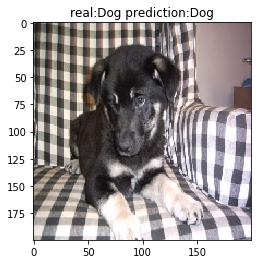

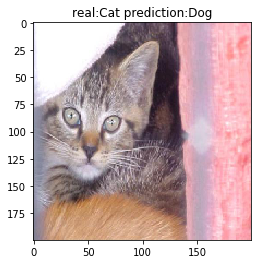

In [13]:
for i in range(2):
    plt.imshow(test_set[0][0][i])
    label=test_set[0][1][i]
    image=test_set[0][0][i]
    image=image.reshape(1,s,s,3)
    prediction=model.predict(image)
    plt.title(f"real:{classes[np.argmax(label)]} prediction:{classes[np.argmax(prediction)]}")
    plt.show()

In [14]:
import cv2

camera = cv2.VideoCapture(0)
for i in range(1):
    return_value, image = camera.read()
    cv2.imwrite('RealTimeData/human/'+str(i)+'.jpg', image)
    
del(camera)

In [15]:
realtestGen=ImageDataGenerator(rescale=1./255)
realtest_set=testGen.flow_from_directory('RealTimeData/',target_size=(s,s),color_mode='rgb',batch_size=2, class_mode='categorical')

Found 1 images belonging to 1 classes.


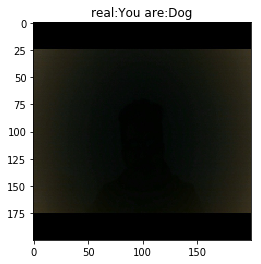

In [16]:
for i in range(1):
    plt.imshow(realtest_set[0][0][i])
    label=realtest_set[0][1][i]
    image=realtest_set[0][0][i]
    image=image.reshape(1,s,s,3)
    prediction=model.predict(image)
    plt.title(f"real:{'You'} are:{classes[np.argmax(prediction)]}")
    plt.show()